In [1]:
import time
import random
from math import *
import operator

import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn import datasets

from sklearn.model_selection import GridSearchCV

# import the ML algorithm
from sklearn.linear_model import LogisticRegression   

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import validation_curve

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [2]:
iris = datasets.load_iris()

X1_sepal = iris.data[:, [0,1]]
X2_petal = iris.data[:, [2,3]]
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y) 

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Visualising the data

In [3]:
# Check the available styles
# plt.style.available

In [4]:
plt.style.use('seaborn-pastel')

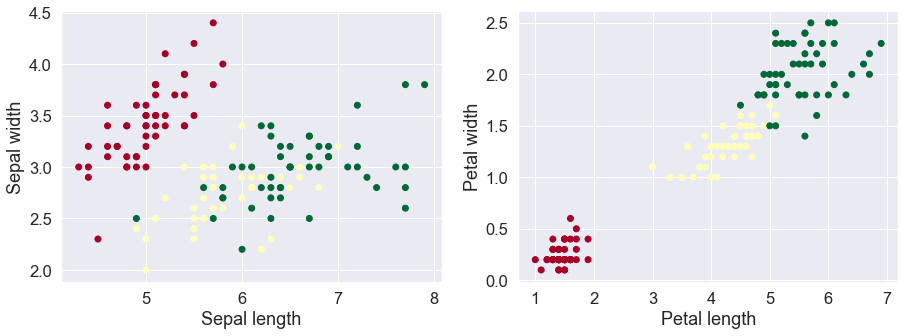

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y, cmap='RdYlGn')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y, cmap='RdYlGn')
plt.xlabel('Petal length')
plt.ylabel('Petal width');

** cmap ** 
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# Create function used to plot decision regions

In [6]:
# def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
#     # Initialise the marker types and colors
#     markers = ('s','x','o','^','v')
#     colors = ('red','blue','lightgreen','gray','cyan')
    
#     #we take the color mapping correspoding to the 
#     #amount of classes in the target data
#     color_Map = ListedColormap(colors[:len(np.unique(y))]) 
    
#     # Parameters for the graph and decision surface
#     x1_min = X[:,0].min() - 1
#     x1_max = X[:,0].max() + 1
#     x2_min = X[:,1].min() - 1
#     x2_max = X[:,1].max() + 1
    
#     xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
#                            np.arange(x2_min,x2_max,resolution))
    
#     Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
#     Z = Z.reshape(xx1.shape)
    
#     plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    
#     plt.xlim(xx1.min(),xx1.max())
#     plt.ylim(xx2.min(),xx2.max())
    
#     # Plot samples
#     X_test, Y_test = X[test_idx,:], y[test_idx]
    
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
#                     alpha = 0.8, c = color_Map(idx),
#                     marker = markers[idx], label = cl
#                    )


# Splitting and scaling the dataset

In [7]:
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal, y, test_size=0.3,random_state=0)

print("# training samples sepal: ", len(X_train_sepal))
print("# testing samples sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal, y, test_size=0.3,random_state=0)

print("# training samples petal: ", len(X_train_petal))
print("# testing samples petal: ", len(X_test_petal))

# training samples sepal:  105
# testing samples sepal:  45
# training samples petal:  105
# testing samples petal:  45


In [8]:
## SCALING
sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std  = sc.transform(X_test_sepal)

sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std  = sc.transform(X_test_petal)

In [9]:
## COMBINING FOR FUTURE PLOTTING
X_combined_sepal_standard = np.vstack((X_train_sepal_std, X_test_sepal_std))
y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

X_combined_petal_standard = np.vstack((X_train_petal_std, X_test_petal_std))
y_combined_petal = np.hstack((y_train_petal, y_test_petal))

# Testing different parameters to understand how accuracies change.

Understanding how decision regions change when using different regularization values.

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

### 1. Testing sepal data with different regularization values.

In [10]:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 5000, 15000]

In [11]:
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range
sepal_acc_table

,C_parameter,Accuracy
0,0.001,NaN
1,0.010,NaN
2,0.100,NaN
3,1.000,NaN
4,10.000,NaN
5,100.000,NaN
6,1000.000,NaN
7,2000.000,NaN
8,5000.000,NaN
9,15000.000,NaN


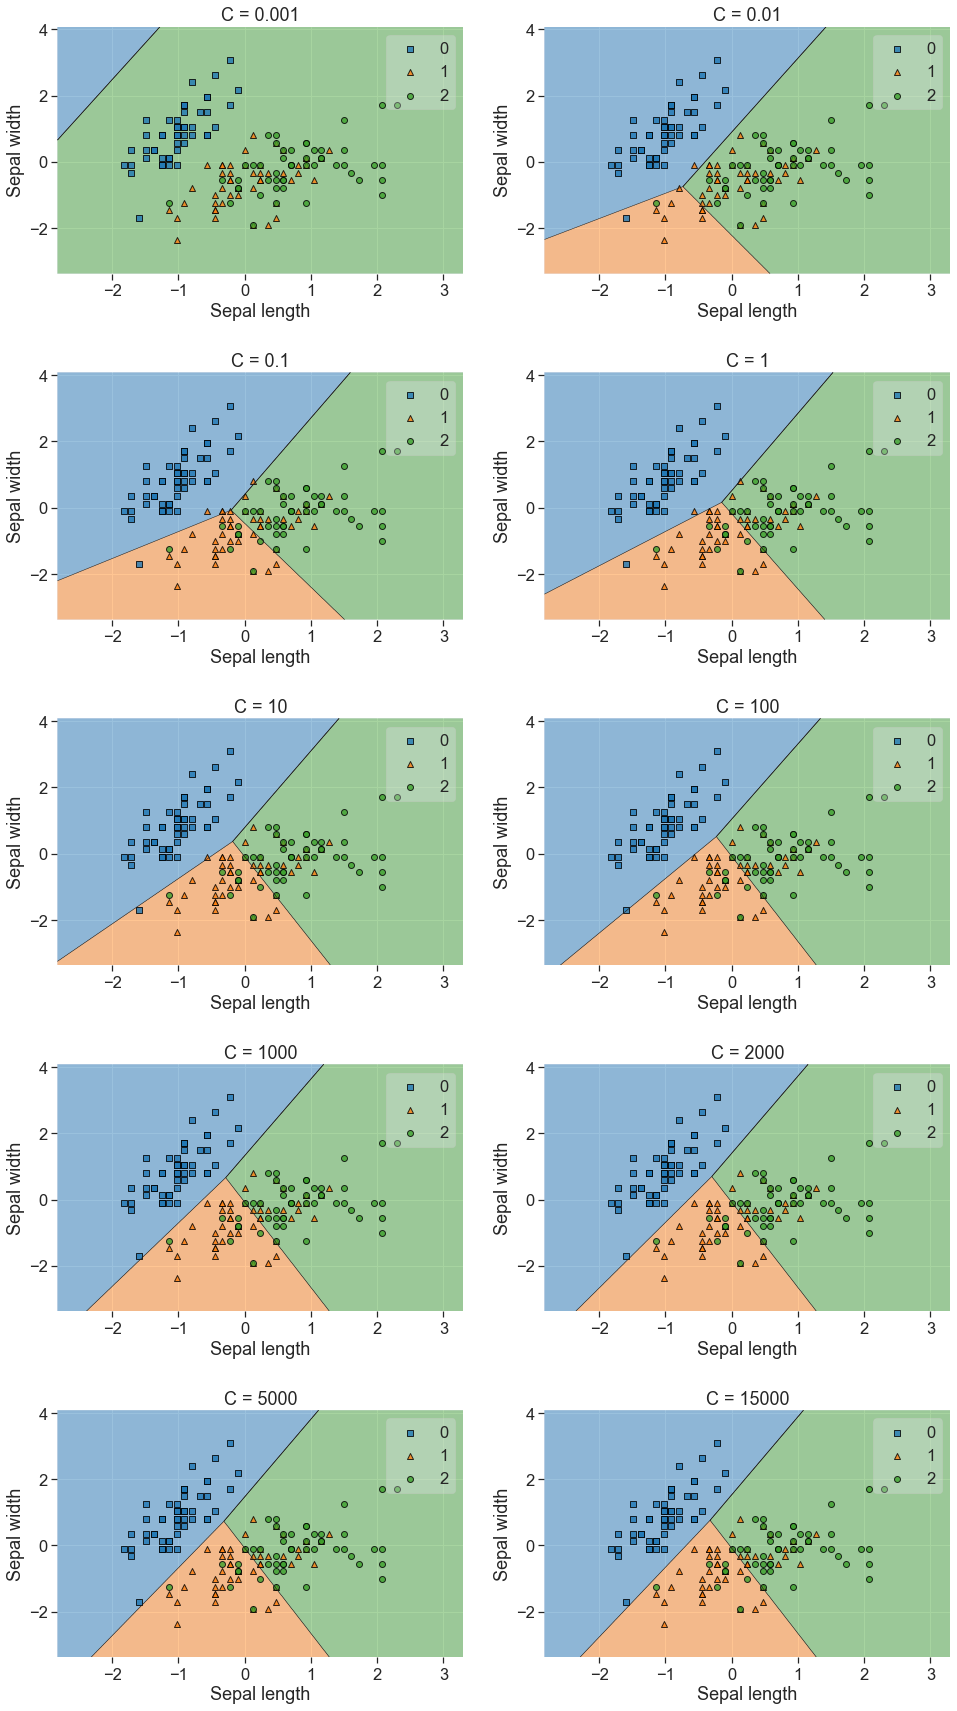

In [12]:
plt.figure(figsize=(16, 30))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(solver       = 'lbfgs', 
                            penalty      = 'l2', 
                            C            = i, 
                            multi_class  = 'ovr', 
                            random_state = 0)
    
    lr.fit(X_train_sepal_std, y_train_sepal)
    
    # Predict using model
    y_pred_sepal = lr.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j, 1] = accuracy_score(y_test_sepal, y_pred_sepal)
    j += 1
    
    # Printing decision regions      
    plt.subplot(5, 2, j)
    plt.subplots_adjust(hspace = 0.4)
  
    plot_decision_regions(X = X_combined_sepal_standard,
                          y = y_combined_sepal,
                          clf=lr, 
                          legend=1)
    
#     plot_decision_regions(X = X_combined_sepal_standard,
#                           y = Y_combined_sepal,
#                           classifier = lr,
#                           test_idx = range(105, 150))
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s'%i)


### 2. Testing petal data with different regularization values.

ValueError: num must be 1 <= num <= 8, not 9

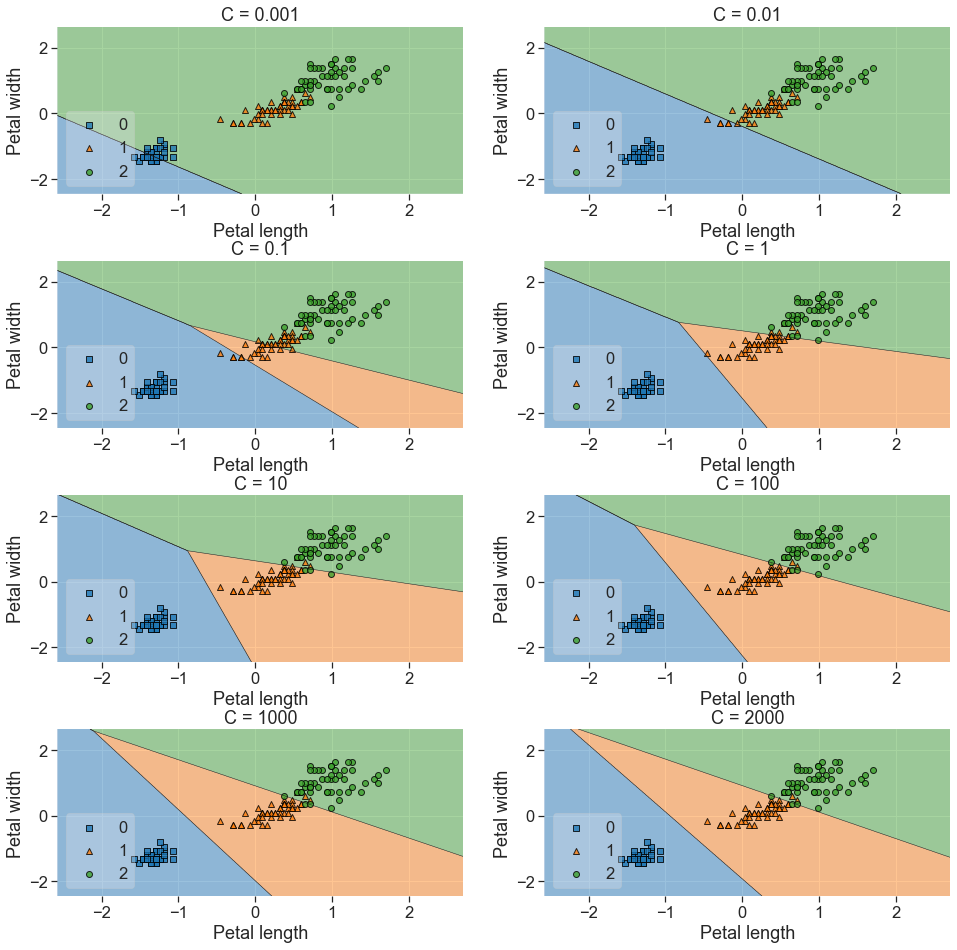

In [13]:
petal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
petal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(16, 16))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(solver='lbfgs', 
                            penalty = 'l2', 
                            C = i, 
                            multi_class='ovr', 
                            random_state = 0)
    
    lr.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = lr.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal, y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(4,2,j)
    plt.subplots_adjust(hspace = 0.4)
    
    plot_decision_regions(X = X_combined_petal_standard,
                          y = y_combined_petal,
                          clf=lr, 
                          legend=3)
    
#     plot_decision_regions(X = X_combined_petal_standard,
#                           y = y_combined_petal,
#                           classifier = lr,
#                           test_idx = range(105,150))
    
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('C = %s'%i)


Here, the effect of using different regularization values is quite obvious. As we mentioned before, small C values will increase the regularization strenght which implies the creation of simple models that tend to underfit the data. By using bigger C values, the model can increase it's complexity and adjust better to the data.

# Understanding which C parameters are the best to use.

#### Use of validation curves for both datasets.

(0.5, 1.0)

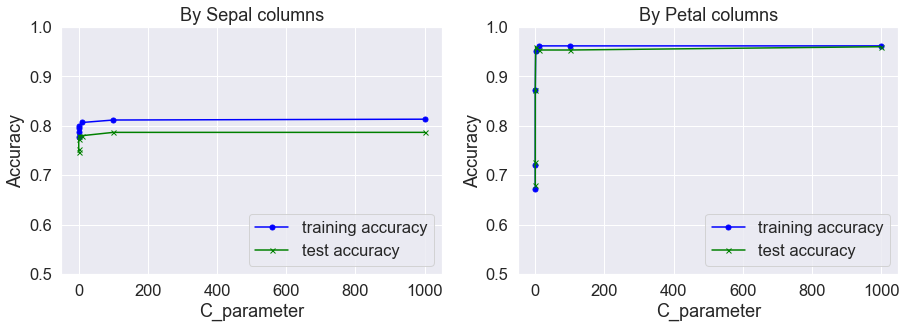

In [14]:
### 1. Use of validation curves for both datasets.
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

plt.figure(figsize=(15, 10))

# Apply logistic regression model to training data
lr = LogisticRegression(solver='lbfgs', 
                        penalty = 'l2', 
                        C = i, 
                        multi_class='ovr', 
                        random_state = 0)

# SEPAL Plot validation curve
train_sepal_scores, test_sepal_scores = validation_curve(   estimator=lr
                                                            ,X=X_combined_sepal_standard
                                                            ,y=y_combined_sepal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,cv=5
                                                            )

train_sepal_mean = np.mean(train_sepal_scores,axis=1)
train_sepal_std  = np.std(train_sepal_scores,axis=1)
test_sepal_mean  = np.mean(test_sepal_scores,axis=1)
test_sepal_std   = np.std(test_sepal_scores,axis=1)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 

plt.title('By Sepal columns')
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

# PETAL Plot validation curve
train_petal_scores, test_petal_scores = validation_curve(estimator=lr
                                                            ,X=X_combined_petal_standard
                                                            ,y=y_combined_petal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,cv=5
                                                            )


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std  = np.std(train_petal_scores,axis=1)
test_petal_mean  = np.mean(test_petal_scores,axis=1)
test_petal_std   = np.std(test_petal_scores,axis=1)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 

plt.title('By Petal columns')
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

The idea is to choose that C which offers the smallest difference between the training and testing accuracy (remember we want to generalise our model to unseen data).

#### Using Grid Search method

In [ ]:
# Set the parameters by cross-validation
c_params = np.linspace(.01, 1000, 100)

tuned_params = [{'solver': ['newton-cg', 'lbfgs', 'sag'], 
                 'C': c_params}
               ]

In [ ]:
# instantiate the Grid Search object
grid = GridSearchCV(estimator = LogisticRegression(max_iter=15000, multi_class='ovr'), 
                   param_grid = tuned_params, 
                   cv         = 5,
                   scoring    = 'accuracy')

In [ ]:
# fit the grid search object
grid.fit(X_combined_sepal_standard, y_combined_sepal)


In [ ]:
grid.best_params_